In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px
from scipy.signal import argrelextrema

In [2]:

df = pd.read_csv("Stock.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(columns=["Unnamed: 0"])
df.set_index("Date", inplace=True)

In [3]:
columns = df.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]


In [4]:
simple_return = [x.replace('Price', 'Simple_return') for x in price]
df[simple_return] = df[price].pct_change() * 100
df= df.fillna(0)

In [5]:
df.head().T

Date,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08
S&P_500_Price,2.724870e+03,2.737700e+03,2.731610e+03,2.706050e+03,2.707880e+03
Nasdaq_100_Price,6.959960e+03,7.023520e+03,6.997620e+03,6.904980e+03,6.913130e+03
Nasdaq_100_Vol.,1.773500e+08,2.067300e+08,1.936000e+08,2.044600e+08,1.680400e+08
Apple_Price,4.281000e+01,4.355000e+01,4.356000e+01,4.273000e+01,4.260000e+01
Apple_Vol.,1.259800e+08,1.444100e+08,1.129600e+08,1.269700e+08,9.528000e+07
Tesla_Price,2.086000e+01,2.142000e+01,2.115000e+01,2.050000e+01,2.039000e+01
Tesla_Vol.,1.102800e+08,1.011400e+08,7.558000e+07,9.781000e+07,8.766000e+07
Microsoft_Price,1.057400e+02,1.072200e+02,1.060300e+02,1.052700e+02,1.056700e+02
Microsoft_Vol.,3.132000e+07,2.733000e+07,2.061000e+07,2.976000e+07,2.146000e+07
Google_Price,5.707000e+01,5.759000e+01,5.614000e+01,5.530000e+01,5.512000e+01


In [6]:
df_price = df[price]
df_price_new= df_price/df_price.iloc[0]

<Axes: xlabel='Date'>

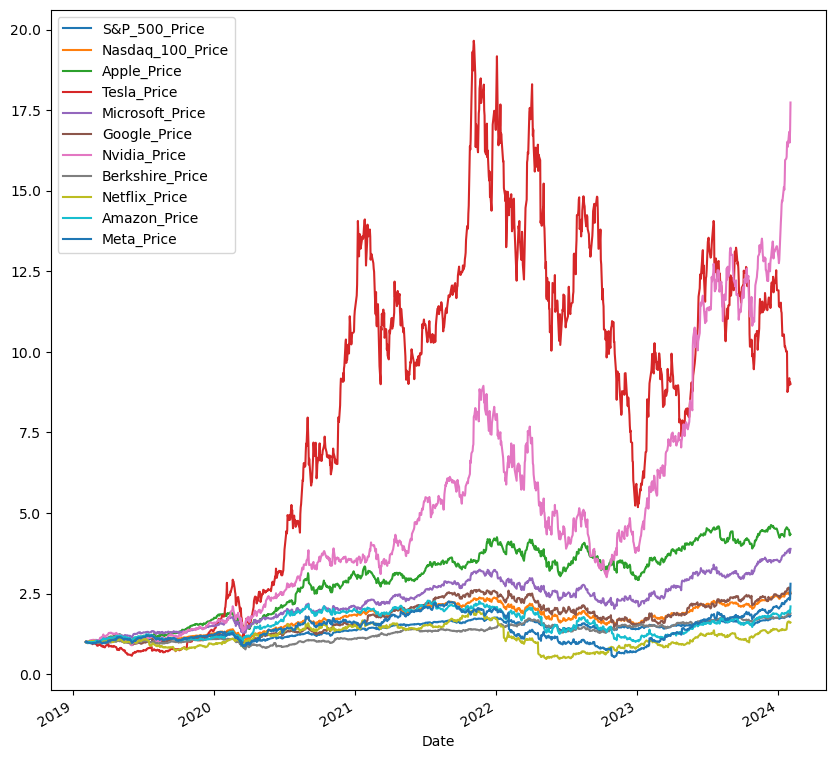

In [7]:
df_price_new.plot(figsize=(10,10))

In [8]:
fig = px.line(data_frame=df_price_new)
fig.show()

In [9]:
#for i in price :
 #   df.plot(y=[i],figsize=(10,10))

In [10]:
mean_simple_return_day = 0
mean_simple_return_year = 0
mean_simple_return_array_day = []
mean_simple_return_array_year = []
for i in simple_return :
    mean_simple_return_day = df[i].mean()
    mean_simple_return_year=mean_simple_return_day*365
    mean_simple_return_array_day.append(mean_simple_return_day)
    mean_simple_return_array_year.append(mean_simple_return_year)

In [11]:
# for i in simple_return :
  #  df.plot(y=[i],figsize=(5,8))

In [12]:
data_visual = pd.DataFrame({'Stock': price, 'Daily_Return': mean_simple_return_array_day, 'Year_Return': mean_simple_return_array_year})

fig = px.histogram(data_frame=data_visual, x='Stock', y='Year_Return')
fig.show()

In [13]:
df_corr=df_price_new[price].corr() 
df_corr = df_corr.mask(df_corr >= 0.999)
most_correlated_price = {}
for column in df_corr.columns:
    max_corr_column = df_corr[column].idxmax() 
    if column != max_corr_column:
        key = f"{column}/{max_corr_column}"
        value = df_corr[column].loc[max_corr_column]
        most_correlated_price[key] = value


In [14]:
def remove_duplicate_values(original_dict):
    unique_dict = {}
    seen_values = set()
    for key, value in original_dict.items():
        if value not in seen_values:
            unique_dict[key] = value
            seen_values.add(value)
    return unique_dict

# Loại bỏ các cặp key-value có giá trị trùng nhau
most_correlated_price = remove_duplicate_values(most_correlated_price)

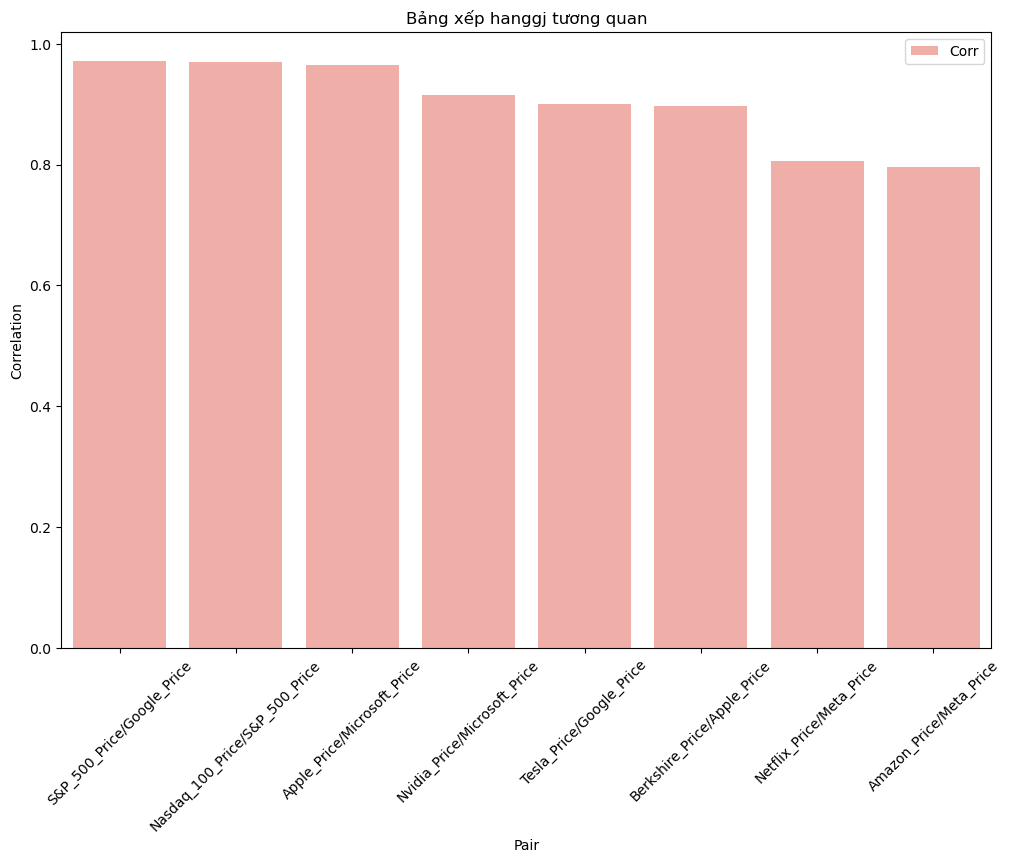

In [15]:
most_correlated_df = pd.DataFrame(data=most_correlated_price.items(), columns=['Pair', 'Correlation']).sort_values(by='Correlation', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Pair', y='Correlation', data=most_correlated_df, color='salmon', alpha=0.7, label='Corr')
plt.xticks(rotation=45)
plt.xlabel('Pair')
plt.ylabel('Correlation')
plt.title('Bảng xếp hanggj tương quan')
plt.legend()
plt.show()

In [16]:
keys_list = list(most_correlated_price.keys())

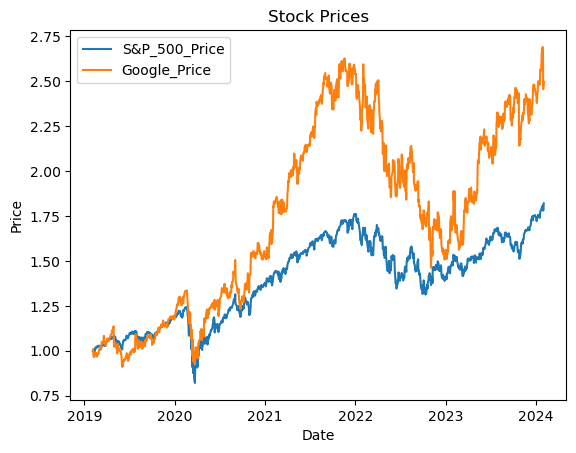

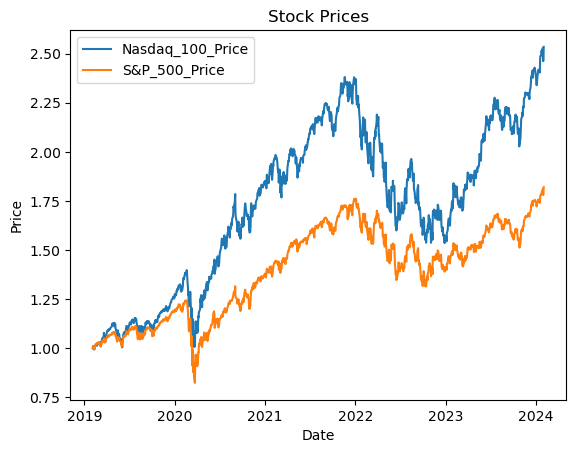

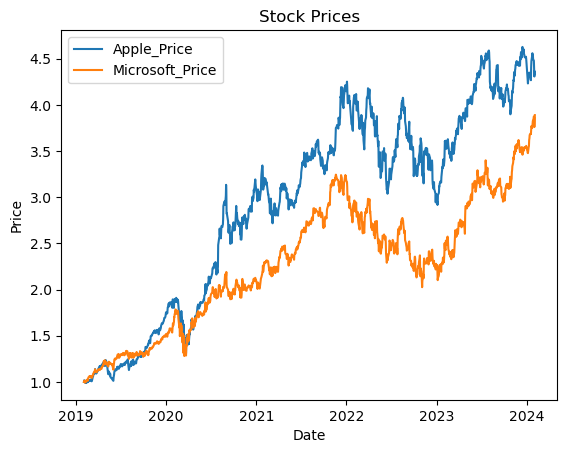

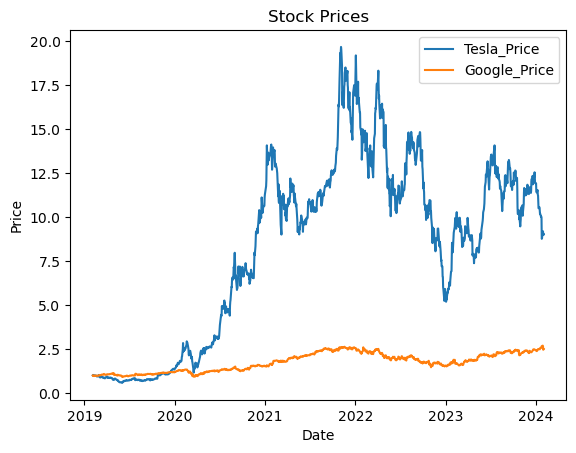

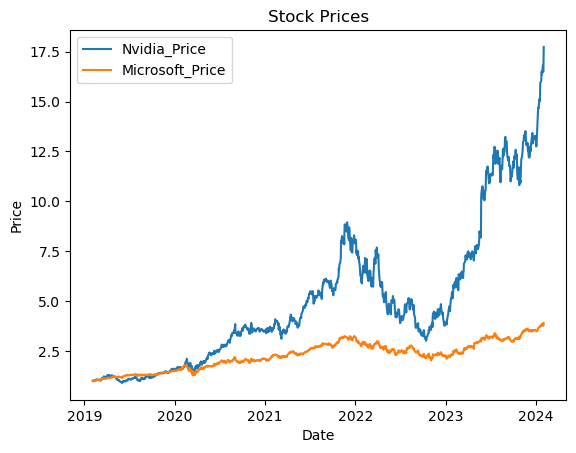

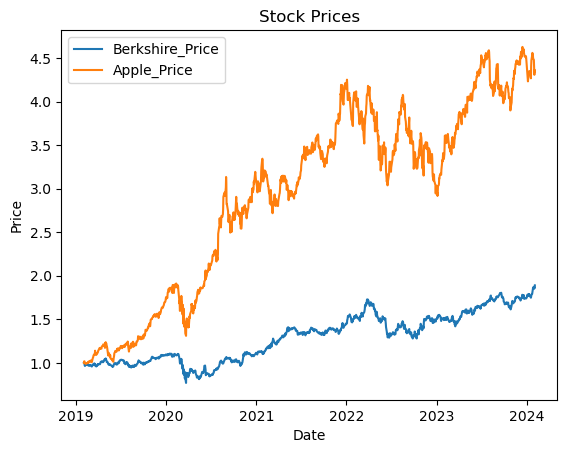

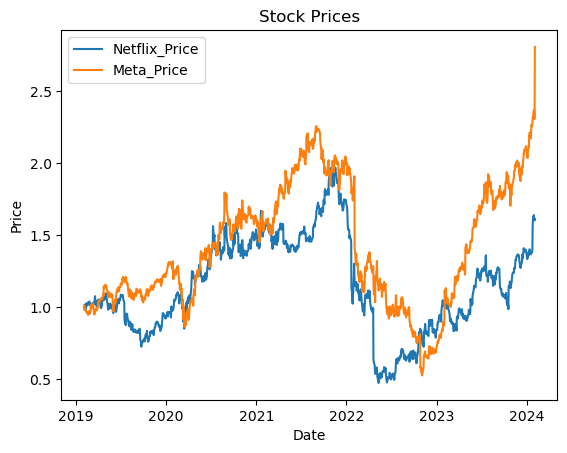

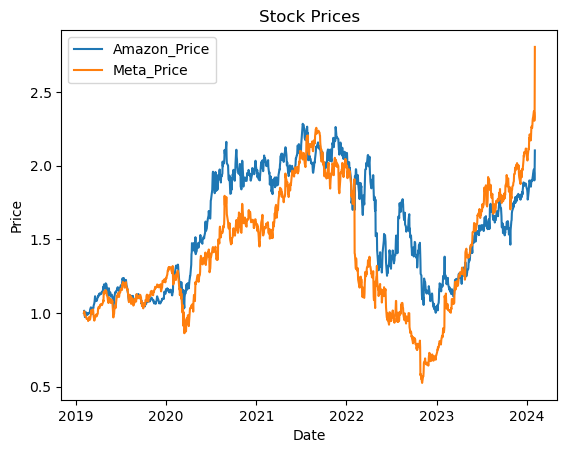

In [17]:
for i in keys_list:
    separated_columns = i.split('/')
    plt.plot(df_price_new.index, df_price_new[separated_columns[0]], label=separated_columns[0])
    plt.plot(df_price_new.index, df_price_new[separated_columns[1]], label=separated_columns[1])
    plt.title('Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()